In [2]:
import glob
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [3]:
db = []
names=[]
for filename in glob.glob("*.csv"):
    if filename != "Acacoyahua.csv" and filename != "FCHCP.csv" and filename != "FLPCP.csv" and filename != "LAENCRUCIJADA.csv" and filename != "SNJERONIMO.csv" and filename != "SuchiateII" and filename != "TALISMAN.csv" and filename != "TAOCP.csv" and filename!= "Adolfo.csv" :
        data = pd.read_csv(filename, skiprows = [i for i in range (7)])
        db.append(data)
        names.append(filename)

In [4]:
Nombres=np.array(names)

In [5]:
names

['Adolfo Ruiz Cortines.csv',
 'Argelia2.csv',
 'ARGOVIA.csv',
 'Cacahoatan.csv',
 'Dorado.csv',
 'FHidalgo.csv',
 'Finca Argovia.csv',
 'FincaChicharras.csv',
 'FincaChirita.csv',
 'FincaPatria.csv',
 'Huehuetan.csv',
 'HUIXTLA.csv',
 'Malpaso.csv',
 'Mazatan.csv',
 'MedioMonte.csv',
 'Salvacion.csv',
 'SD.csv',
 'SJ.csv',
 'Suchiate2.csv',
 'TalismanI.csv',
 'TRegulador.csv']

In [6]:
for i in range(len(db)):
    db[i] = db[i].rename(columns = {" Temperatura Media(ºC)": "TemperaturaMedia"})
    db[i]["TemperaturaMedia"] = db[i].TemperaturaMedia.replace("-", np.nan).astype(float)
    db[i]["Fecha"] = pd.to_datetime(db[i]["Fecha"], dayfirst = True)
    db[i]["Año"] = db[i]["Fecha"].dt.year
    db[i]["Mes"] = db[i]["Fecha"].dt.month
    db[i]["Día"] = db[i]["Fecha"].dt.day
    db[i].drop([" Precipitación(mm)"],axis=1)
    db[i]=db[i].loc[(db[i].Año >= 1954) & (db[i].Mes == 5)]
    db[i]=db[i].reset_index()
    db[i]=db[i].drop(["index"],axis=1)

In [7]:
#Creemos urbano y rural
for i in range(len(db)):
    if names[i]=="Cacahoatan.csv" or names[i]=="FHidalgo.csv" or names[i]=="HUIXTLA.csv" or names[i]=="MedioMonte.csv" or names[i]=="SD.csv" or names[i]=="SJ.csv" or names[i]=="TalismanI.csv" or names[i]=="Suchiate2.csv" or names[i]=="Salvacion.csv" or names[i]=="Mazatan.csv":
        db[i]["Tipo"]=["urbano" for i in range(len(db[i]))]
    else:
        db[i]["Tipo"]=["rural" for i in range(len(db[i]))]

In [8]:
tipos = pd.concat(db, ignore_index = True)
tipos

,Fecha,Precipitación(mm),TemperaturaMedia,Temperatura Máxima(ºC),Temperatura Mínima(ºC),Evaporación(mm),Año,Mes,Día,Tipo
0,1985-05-01,0.00,27.0,35.00,19.00,-,1985,5,1,rural
1,1985-05-02,0.00,27.5,36.00,19.00,-,1985,5,2,rural
2,1985-05-03,0.00,28.0,36.00,20.00,-,1985,5,3,rural
3,1985-05-04,0.00,27.5,36.00,19.00,-,1985,5,4,rural
4,1985-05-05,0.00,27.0,35.00,19.00,-,1985,5,5,rural
...,...,...,...,...,...,...,...,...,...,...
37102,2022-05-27,NaN,NaN,NaN,NaN,NaN,2022,5,27,rural
37103,2022-05-28,NaN,NaN,NaN,NaN,NaN,2022,5,28,rural
37104,2022-05-29,NaN,NaN,NaN,NaN,NaN,2022,5,29,rural
37105,2022-05-30,NaN,NaN,NaN,NaN,NaN,2022,5,30,rural


<Axes: xlabel='Año', ylabel='TemperaturaMedia'>

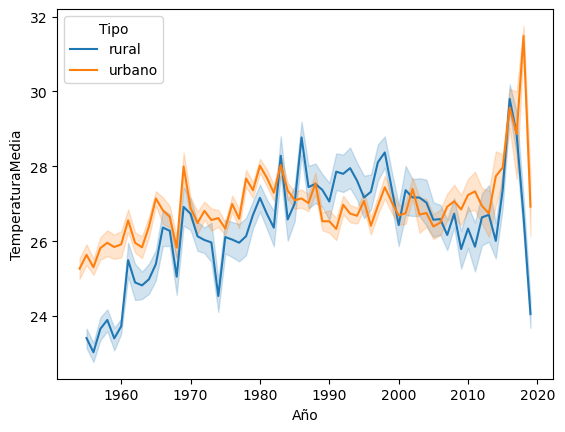

In [9]:
sns.lineplot(data=tipos, x="Año",y="TemperaturaMedia", hue="Tipo")

In [10]:
copia = tipos
copia

,Fecha,Precipitación(mm),TemperaturaMedia,Temperatura Máxima(ºC),Temperatura Mínima(ºC),Evaporación(mm),Año,Mes,Día,Tipo
0,1985-05-01,0.00,27.0,35.00,19.00,-,1985,5,1,rural
1,1985-05-02,0.00,27.5,36.00,19.00,-,1985,5,2,rural
2,1985-05-03,0.00,28.0,36.00,20.00,-,1985,5,3,rural
3,1985-05-04,0.00,27.5,36.00,19.00,-,1985,5,4,rural
4,1985-05-05,0.00,27.0,35.00,19.00,-,1985,5,5,rural
...,...,...,...,...,...,...,...,...,...,...
37102,2022-05-27,NaN,NaN,NaN,NaN,NaN,2022,5,27,rural
37103,2022-05-28,NaN,NaN,NaN,NaN,NaN,2022,5,28,rural
37104,2022-05-29,NaN,NaN,NaN,NaN,NaN,2022,5,29,rural
37105,2022-05-30,NaN,NaN,NaN,NaN,NaN,2022,5,30,rural


In [11]:
copia = copia.dropna(subset=["TemperaturaMedia", "Año"])
copia = copia.reset_index()

In [12]:
copia

,index,Fecha,Precipitación(mm),TemperaturaMedia,Temperatura Máxima(ºC),Temperatura Mínima(ºC),Evaporación(mm),Año,Mes,Día,Tipo
0,0,1985-05-01,0.00,27.00,35.00,19.00,-,1985,5,1,rural
1,1,1985-05-02,0.00,27.50,36.00,19.00,-,1985,5,2,rural
2,2,1985-05-03,0.00,28.00,36.00,20.00,-,1985,5,3,rural
3,3,1985-05-04,0.00,27.50,36.00,19.00,-,1985,5,4,rural
4,4,1985-05-05,0.00,27.00,35.00,19.00,-,1985,5,5,rural
...,...,...,...,...,...,...,...,...,...,...,...
23290,35924,1984-05-27,25.00,25.00,30.00,20.00,6.91,1984,5,27,rural
23291,35925,1984-05-28,7.00,24.00,28.00,20.00,6.91,1984,5,28,rural
23292,35926,1984-05-29,14.00,24.75,29.00,20.50,6.91,1984,5,29,rural
23293,35927,1984-05-30,0.00,24.75,28.50,21.00,6.91,1984,5,30,rural


In [13]:
# Ingresando los datos en vectores independientes.
xrural = []
yrural = []
xurbano = []
yurbano = []
for i in range(len(copia)):
    if copia["Tipo"][i] == "rural":
        xrural.append(copia["Año"][i])
        yrural.append(copia["TemperaturaMedia"][i])
    else:
        xurbano.append(copia["Año"][i])
        yurbano.append(copia["TemperaturaMedia"][i])
#Bases de datos separadas de urbano y rural

dfurbano = pd.DataFrame({"Año": xrural, "TemperaturaMedia" : yrural})
dfrural = pd.DataFrame({"Año": xurbano, "TemperaturaMedia": yurbano})

In [14]:
regUrbano = LinearRegression()
regUrbano.fit(dfurbano[["Año"]], dfurbano[["TemperaturaMedia"]])
regRural = LinearRegression()
regRural.fit(dfrural[["Año"]], dfrural[["TemperaturaMedia"]])

LinearRegression()

In [19]:
detUrbano = regUrbano.score(dfurbano[["Año"]], dfurbano[["TemperaturaMedia"]])
detRural = regRural.score(dfurbano[["Año"]], dfurbano[["TemperaturaMedia"]])

El coeficiente de determinación de la zona Urbana es:  0.025561999206019426
Mientras que el coeficiente de determinación de la zona rural es:  0.014075934835767301


Text(0.5, 1.0, 'Temperatura Rural Vs Urbano')

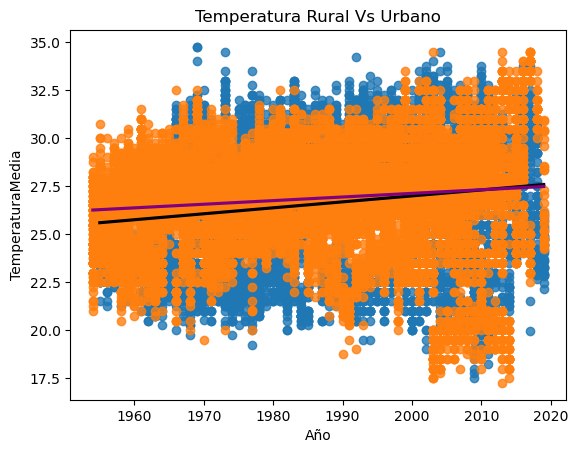

In [20]:
#Imprimiendo la tabla y obteniendo los datos de cada Regresión
print("El coeficiente de determinación de la zona Urbana es: ", detUrbano)
print("Mientras que el coeficiente de determinación de la zona rural es: ", detRural)
sns.regplot(x=dfurbano["Año"], y = dfurbano["TemperaturaMedia"], ci = 95, line_kws = {"color": "black"})
sns.regplot(x=dfrural["Año"], y = dfrural["TemperaturaMedia"], ci = 95, line_kws = {"color": "purple"})
plt.title("Temperatura Rural Vs Urbano")